In [28]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [3]:

transform = transforms.Compose([
    transforms.ToTensor(),  # Converts image to PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Download the training and test datasets
train_dataset = datasets.FashionMNIST(
    root="../data/raw/train/",
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.FashionMNIST(
    root="../data/raw/test/",
    train=False,
    download=True,
    transform=transform
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 15.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 301kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.20MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 21.8MB/s]
100%|██████████| 26.4M/26.4M [00:02<00:00, 8.87MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 298kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.42MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.0MB/s]


In [32]:
BATCH_SIZE = 64

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

Image shape: torch.Size([1, 28, 28])
image.squeeze() shape: torch.Size([28, 28])


Text(0.5, 1.0, 'Ankle boot')

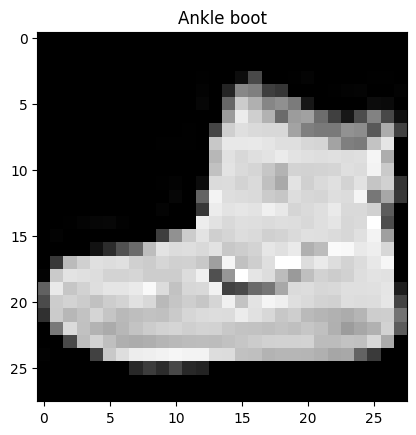

In [30]:
image, label = train_dataset[0]

print(f"Image shape: {image.shape}")

print(f"image.squeeze() shape: {image.squeeze().shape}")

class_names = train_dataset.classes

plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

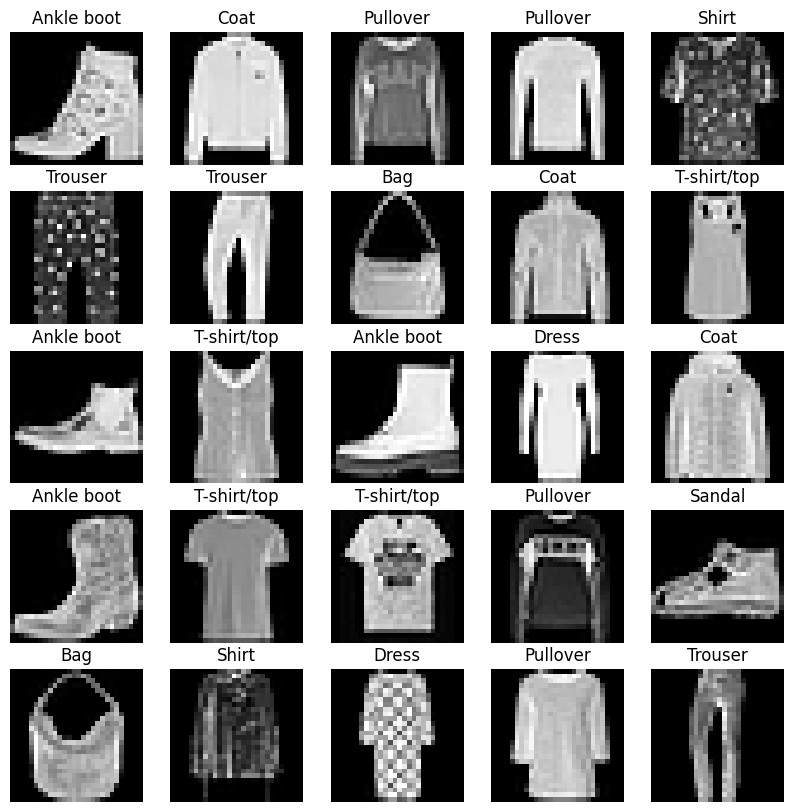

In [29]:
# let's randomly look into some images from training dataset
fig = plt.figure(figsize=(10, 10))
rows, cols = 5, 5
for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
    img, label = train_dataset[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

Text(0.5, 1.0, 'Sandal')

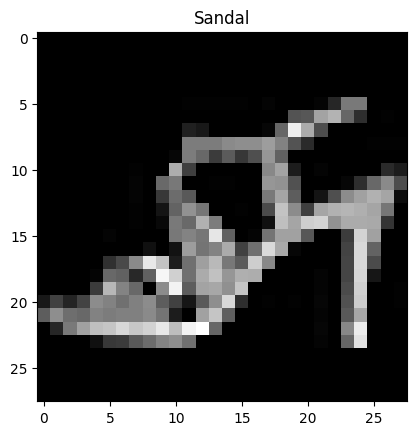

In [35]:
images, labels = next(iter(train_loader))

plt.imshow(images[0].squeeze(), cmap="gray")
plt.title(class_names[labels[0]])